# 単回帰モデル

単回帰1でmedianHouseValueが最大値で切れていたため、これが含まれる特徴量を除外した。

,medianIncome,medianHouseValue
count,19647.000000,19647.000000
mean,3.676174,192042.067288
std,1.570292,97095.533724
min,0.499900,14999.000000
25%,2.526300,116450.000000
50%,3.449000,173600.000000
75%,4.581950,247900.000000
max,15.000100,499100.000000


COEF [40014.54166682]
INTERCEPT 44904.29378410653
MSE: 5407658904.251762
R2: 0.4188411619699911


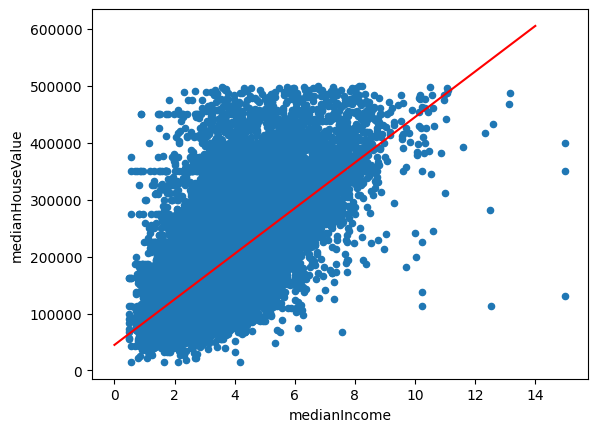

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt


# データ読み込み
cal_housing = pd.read_csv('datasets/cal_housing/CaliforniaHousing/cal_housing.data', sep=',')
cal_housing.columns = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']


# データクレンジング
cal_housing = cal_housing[cal_housing['medianHouseValue'] < 500000]


# 関連する基本統計量
display(cal_housing[['medianIncome', 'medianHouseValue']].describe())


def train(X, y):
  # 訓練データとテストデータに分割
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

  # 学習
  model = LinearRegression()
  model.fit(X_train, y_train)

  # 評価
  mse = mean_squared_error(y_test, model.predict(X_test))
  r2 = r2_score(y_test, model.predict(X_test))
  print('COEF', model.coef_)
  print('INTERCEPT', model.intercept_)
  print('MSE:', mse)
  print('R2:', r2)

  return model


# グラフ表示
cal_housing.plot(kind='scatter', x='medianIncome', y='medianHouseValue')

# 学習・評価
longitude_model = train(cal_housing[['medianIncome']], cal_housing['medianHouseValue'])

# 回帰直線の表示
x_values = np.linspace(0, 14)
y_values = longitude_model.coef_ * x_values + longitude_model.intercept_

plt.plot(x_values, y_values, color='red')
plt.show()
